# Delineate QRS peaks, onsets and offsets

This example shows how to use Neurokit to delineate the ECG peaks, including P-peaks and T-peaks, as well their onsets and offsets from a cleaned ECG signal.

In [4]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

In this example, we will use a short segment of ECG signal with sampling rate of 1000 Hz. 

## Prepare the inputs

In [54]:
# Retrieve ECG data from data folder (sampling rate= 1000 Hz)
ecg_signal = np.array(pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit/dev/data/example_ecg_1000hz.csv"))[:, 1]

# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=1000)

The [ecg_peaks()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_peaks>) function will return a dictionary contains the samples at which R-peaks are located. 

Let's visualize the R-peaks location in the signal to make sure it got detected correctly.

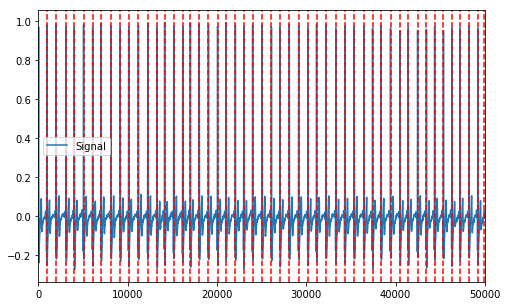

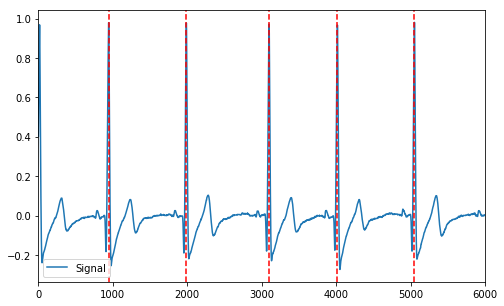

In [5]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:6000])

Visually, the R-peaks seem to have been correctly identified. You can also explore searching for R-peaks using different methods provided by Neurokit [ecg_peaks()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_peaks>).

## Locate other ECG peaks and their respective boundaries

In [ecg_delineate()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_delineator>), Neurokit implements different methods to segment the QRS complexes. There are the derivative method and the other methods that make use of Wavelet to delineate the complexes. 

### Derivative method

First, let's take a look at the derivative method and its output.

In [59]:
# Delineate the ECG signal
signal_derivative, waves_derivative = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=1000)

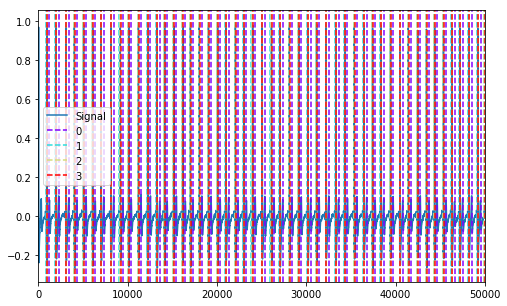

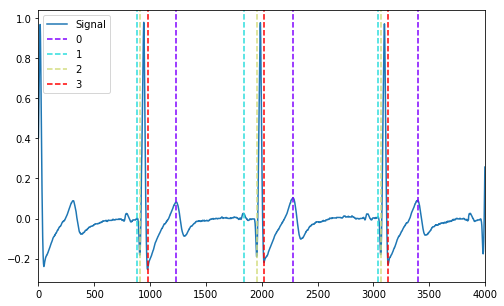

In [18]:
# Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_derivative['ECG_T_Peaks'], 
                       waves_derivative['ECG_P_Peaks'],
                       waves_derivative['ECG_Q_Peaks'],
                       waves_derivative['ECG_S_Peaks']], ecg_signal)

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_derivative['ECG_T_Peaks'][:3], 
                       waves_derivative['ECG_P_Peaks'][:3],
                       waves_derivative['ECG_Q_Peaks'][:3],
                       waves_derivative['ECG_S_Peaks'][:3]], ecg_signal[:4000])


Visually, the derivative method seems to have correctly identified the Q-peaks, S-peaks and T-peaks. However, the algorithm is not optimized to identify the P-peaks in this signal. 

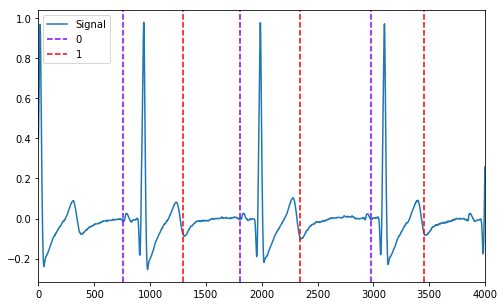

In [19]:
# Zooming into the first 3 R-peaks, with focus on onsets of P-peaks and offsets of T-peaks
plot = nk.events_plot([waves_derivative['ECG_P_Onsets'][:3],
                       waves_derivative['ECG_T_Offsets'][:3]], ecg_signal[:4000])

The offsets of T-peaks appears to have been correctly identified here while the onsets of P-peaks do not seem so. 

Let's next take a look at the continuous wavelet method.

### Continuous Wavlet Method

In [58]:
# Delineate the ECG signal
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=1000, method="cwt")

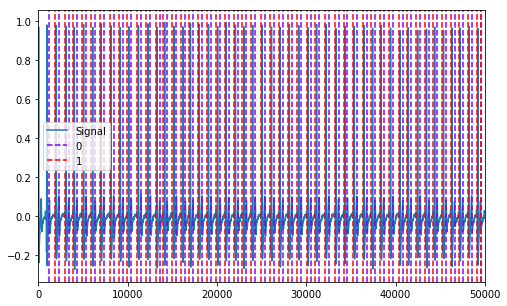

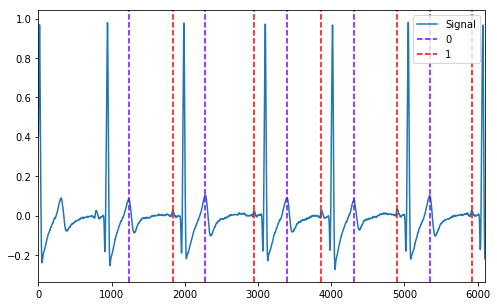

In [20]:
# Visualize the T-peaks and P-peaks
plot = nk.events_plot([waves_cwt['ECG_T_Peaks'], 
                       waves_cwt['ECG_P_Peaks']], ecg_signal)

# Zooming into the first 5 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_cwt['ECG_T_Peaks'][:5], 
                       waves_cwt['ECG_P_Peaks'][:5]], ecg_signal[:6100])

*Unlike the derivative method, the continuous wavelet method does not idenfity the Q-peaks and S-peaks*

Here, visually, the locations of T-peaks and P-peaks appear to be correct. In your own machine, you can zoom into individual peaks to inspect the delineated signals.

Next, let's look at the onsets and offsets of the respective waves.

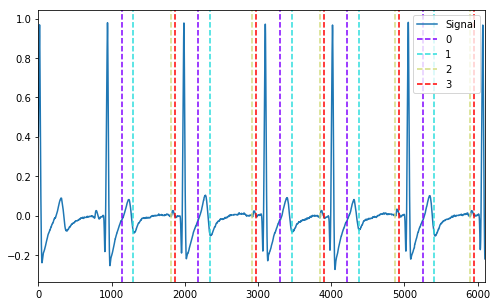

In [23]:
# Zooming into the first 5 R-peaks, with focus on onsets and offsets of P-peaks and T-peaks
plot = nk.events_plot([waves_cwt['ECG_T_Onsets'][:5], 
                       waves_cwt['ECG_T_Offsets'][:5],
                       waves_cwt['ECG_P_Onsets'][:5],
                       waves_cwt['ECG_P_Offsets'][:5]], ecg_signal[:6100])

From the plots, the onsets and offsets of P-peaks and T-peaks appears pretty accurate.

Last but not least, we will look at the third method in Neurokit [ecg_delineate()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_delineator>) function: the discrete wavelet method. 

### Discrete wavelet method

In [60]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=1000, method="dwt")

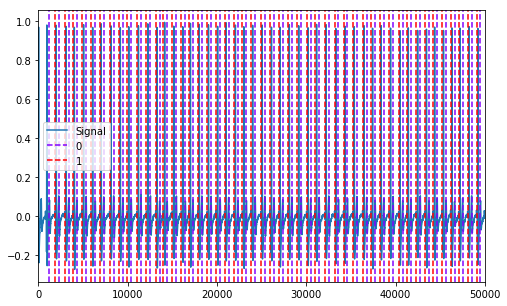

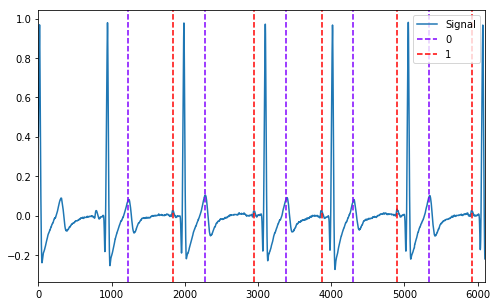

In [35]:
# Visualize the T-peaks and P-peaks
plot = nk.events_plot([waves_dwt['ECG_T_Peaks'], 
                       waves_dwt['ECG_P_Peaks']], ecg_signal)

# Zooming into the first 5 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_dwt['ECG_T_Peaks'][:5], 
                       waves_dwt['ECG_P_Peaks'][:5]], ecg_signal[:6100])

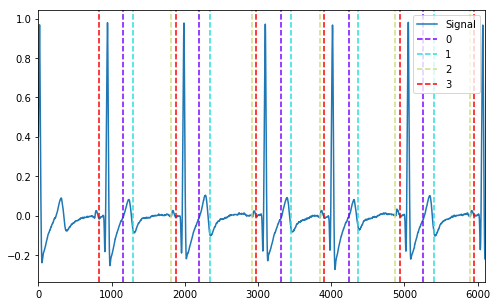

In [31]:
# Zooming into the first 5 R-peaks, with focus on onsets and offsets of P-peaks and T-peaks
plot = nk.events_plot([waves_dwt['ECG_T_Onsets'][:5], 
                       waves_dwt['ECG_T_Offsets'][:5],
                       waves_dwt['ECG_P_Onsets'][:5],
                       waves_dwt['ECG_P_Offsets'][:6]], ecg_signal[:6100])

From the first few QRS complexes, the discrete wavelet method and the continuous wavelet method seems to share similar performances. 

However, with noisier signal, we might see the differences between the methods.

## Visualize delineation outputs on epochs of ECG signal

In the next section, we will compare the outputs of three delineation methods on a noisier ECG signal. And to have a better overview of their performances, we will visualize the peaks and their boundaries on the epochs of ecg signal.

### Function for visualisation of delineation outputs

In [127]:
def delineation_plot(epochs, signal_features_type='all'):

    data = nk.epochs_to_df(epochs)
    data_cols = data.columns.values

    dfs = []
    for feature in data_cols:
        if signal_features_type == "peaks":
            if any(x in str(feature) for x in ["Peak"]):
                df = data[feature]
                dfs.append(df)
        elif signal_features_type == "bounds_R":
            if any(x in str(feature) for x in ["ECG_R_Onsets", "ECG_R_Offsets"]):
                df = data[feature]
                dfs.append(df)
        elif signal_features_type == "bounds_T":
            if any(x in str(feature) for x in ["ECG_T_Onsets", "ECG_T_Offsets"]):
                df = data[feature]
                dfs.append(df)
        elif signal_features_type == "bounds_P":
            if any(x in str(feature) for x in ["ECG_P_Onsets", "ECG_P_Offsets"]):
                df = data[feature]
                dfs.append(df)
        elif signal_features_type == "all":
            if any(x in str(feature) for x in ["Peak", "Onset", "Offset"]):
                df = data[feature]
                dfs.append(df)
    features = pd.concat(dfs, axis=1)

    fig, ax = plt.subplots()
    for label in data.Label.unique():
        epoch_data = data[data.Label == label]
        ax.plot(epoch_data.Time, epoch_data.Signal, label='_nolegend_')
    for i, feature_type in enumerate(features.columns.values):
        event_data = data[data[feature_type] == 1.0]
        ax.scatter(event_data.Time, event_data.Signal,
                   label=feature_type, alpha=0.5, s=200)
        ax.legend()
    return fig

### Create epochs and plotting of delineation outputs

As mentioned, in this section, we will be looking at a noisier ECG signal which can be a challenge for the waves delineation.

In [67]:
ecg_signal_2 = np.array(pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit/dev/data/example_ecg_3000hz.csv"))[:, 1]

# Extract R-peaks locations
_, rpeaks_2 = nk.ecg_peaks(ecg_signal_2, sampling_rate=3000)

First, let's take a look at the derivative method.

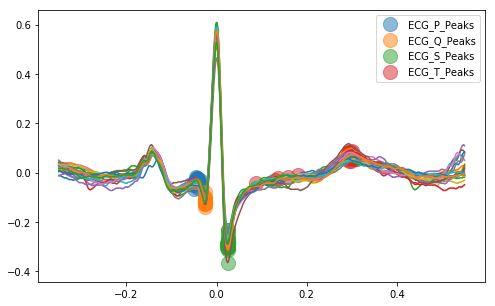

In [123]:
# Delineate the ECG signal with derivative
signal_derivative_2, waves_derivative_2 = nk.ecg_delineate(ecg_signal_2, rpeaks_2, sampling_rate=3000)

# Segment the signal around the R-peaks
epochs_derivative = nk.epochs_create(ecg_signal_2, events=rpeaks_2['ECG_R_Peaks'], 
                          signal_features=signal_derivative_2,
                          sampling_rate=3000, 
                          epochs_start=-0.35, epochs_end=0.55)

# Plot
plot = delineation_plot(epochs_derivative, signal_features_type='peaks')

Seems like the derivative method is doing a pretty good job with Q-Peaks and S-peaks here. However, since the signal is relatively noisy, its P-peaks and T-peaks are not that great.

Next, let's see how the continuous wavelet method performs.

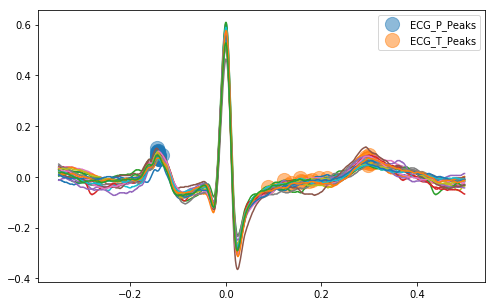

In [122]:
# Delineate the ECG signal with cwt
signal_cwt_2, waves_cwt_2 = nk.ecg_delineate(ecg_signal_2, rpeaks_2, sampling_rate=3000, method='cwt')

# Segment the signal around the R-peaks
epochs_cwt = nk.epochs_create(ecg_signal_2, events=rpeaks_2['ECG_R_Peaks'], 
                          signal_features=signal_cwt_2,
                          sampling_rate=3000, 
                          epochs_start=-0.35, epochs_end=0.5)
# Plot
plot = delineation_plot(epochs_cwt, signal_features_type='peaks')

While the P-peaks delineated by the continuous wavelet method is clearly quite accurate, it is not doing very well with the T-peaks neither. 

How about the discrete wavelet method?

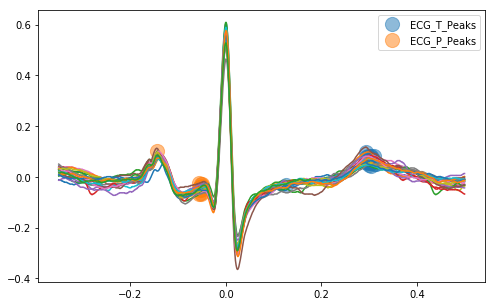

In [121]:
# Delineate the ECG signal with dwt
signal_dwt_2, waves_dwt_2 = nk.ecg_delineate(ecg_signal_2, rpeaks_2, sampling_rate=3000, method='dwt')

# Segment the signal around the R-peaks
epochs_dwt = nk.epochs_create(ecg_signal_2, events=rpeaks_2['ECG_R_Peaks'], 
                          signal_features=signal_dwt_2,
                          sampling_rate=3000, 
                          epochs_start=-0.35, epochs_end=0.5)
# Plot
plot = delineation_plot(epochs_dwt, signal_features_type='peaks')

Well, as opposed to the other two methods, this method is quite superior in identifying the T-peaks. However, it is not doing as well as the continuous wavelet method with the P-peaks.

Clearly, each method excels in different type of features. Following, we can help compare their performances in delineating the boundaries of the waves. 

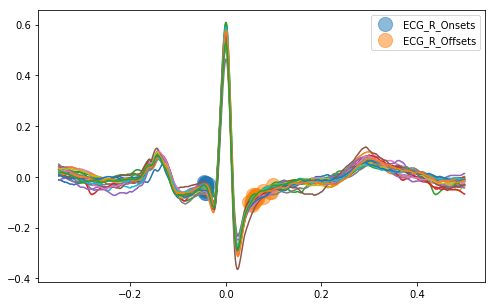

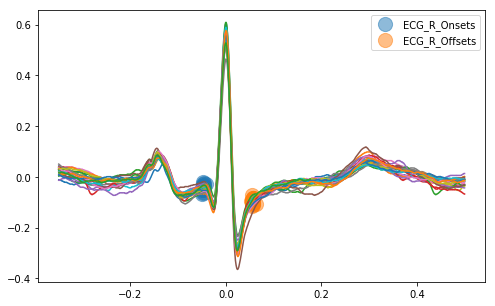

In [128]:
# R-waves boundaries
## CWT method
plot = delineation_plot(epochs_cwt, signal_features_type='bounds_R')
## DWT method
plot = delineation_plot(epochs_dwt, signal_features_type='bounds_R')

For delineation of onsets and offets of QRS complex of this ECG signal, the DWT seems to be superior to the CWT.